In [9]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, BasicAer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-08 08:02:01,393: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    quantum_circuit = QuantumCircuit(n, name = name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    quantum_circuit.unitary(Operator(oracle_matrix), range(n))
    return quantum_circuit


def diffuser(n):
    quantum_circuit = QuantumCircuit(n, name = 'Diff - "V"')
    quantum_circuit.h(range(n))
    quantum_circuit.append(phase_oracle(n, [0]), range(n))
    quantum_circuit.h(range(n))
    return quantum_circuit

def Grovers_Algo(n, marked):
    quantum_circuit = QuantumCircuit(n, n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basic state {marked} marked, {r} rounds')
    quantum_circuit.h(range(n))
    
    for _ in range(r):
        quantum_circuit.append(phase_oracle(n, marked), range(n))
        quantum_circuit.append(diffuser(n), range(n))
    quantum_circuit.measure(range(n), range(n))
    return quantum_circuit

5 qubits, basic state [16] marked, 4 rounds


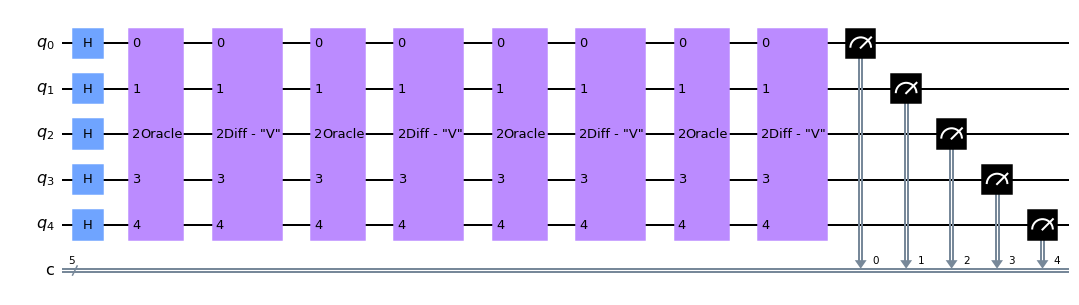

In [11]:
n = 5
x = np.random.randint(2**n)
marked = [x]
quantum_circuit = Grovers_Algo(n, marked)

quantum_circuit.draw()

{'01010': 1, '10101': 1, '01101': 1, '11100': 1, '10000': 9992, '00100': 1, '11011': 1, '00000': 1, '00111': 1}
3.919534679768385


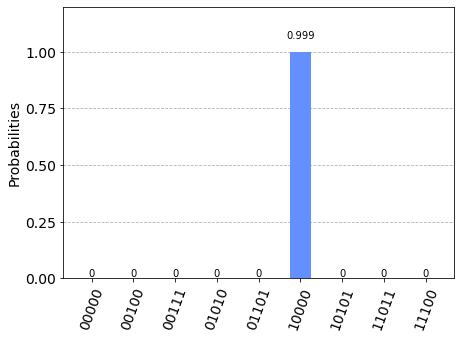

In [12]:
backend = Aer.get_backend('qasm_simulator')
result = execute(quantum_circuit, backend, shots = 10000).result()
counts = result.get_counts(quantum_circuit)
print(counts)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(counts)

In [17]:
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)

while (y == x):
    y = np.random.randint(2**n)
marked = [x, y]
quantum_circuit = Grovers_Algo(n, marked)

backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits == 5 and 
                                       not x.configuration().simulator and x.status().operational == True))

backend = provider.get_backend('ibmq_belem')
%qiskit_job_watcher

shots = 1024
job = execute(quantum_circuit, backend = backend, shots = shots, optimization_level = 3)

3 qubits, basic state [2, 0] marked, 1 rounds


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

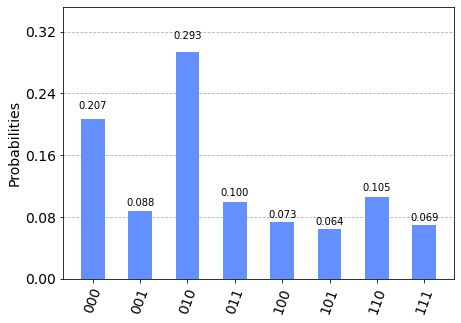

In [18]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

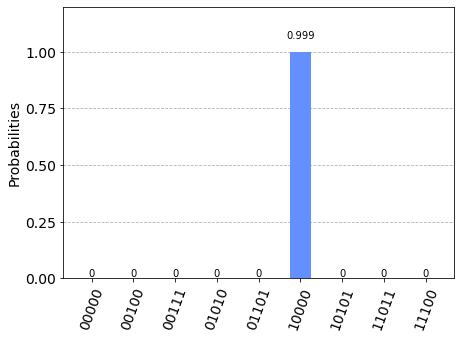

In [20]:
backend = provider.get_backend('ibmq_belem')
old_job = backend.retrieve_job('61b083b2bd9cd24c0256bbee')
results = old_job.result()
answer = results.get_counts()
plot_histogram(counts)